# CollegeMsg Dataset

This dataset was downloaded from: http://snap.stanford.edu/data/CollegeMsg.html

---

Import libs

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

import os

import networkx as nx
import pandas as pd

---

Set dataset input path

In [32]:
INPUT_DIR = '../../../data/CollegeMsg/'
INPUT_PATH = '../../../data/CollegeMsg/CollegeMsg.txt.gz'

Load dataset

In [3]:
df = pd.read_csv(INPUT_PATH, sep=' ', names=['src', 'dst', 'time'])
df

,src,dst,time
0,1,2,1082040961
1,3,4,1082155839
2,5,2,1082414391
3,6,7,1082439619
4,8,7,1082439756
...,...,...,...
59830,1899,1847,1098776648
59831,1899,1097,1098776836
59832,1899,277,1098777003
59833,1878,1624,1098777111


---

Build Dataset

In [4]:
from tsvar.preprocessing import Dataset

In [26]:
dataset = Dataset(INPUT_PATH, top=100, timescale='median', verbose=True)

In [27]:
start_time = min(map(min, dataset.timestamps))
dataset.timestamps = [ev - start_time for ev in dataset.timestamps]
dataset.end_time = max(map(max, dataset.timestamps))

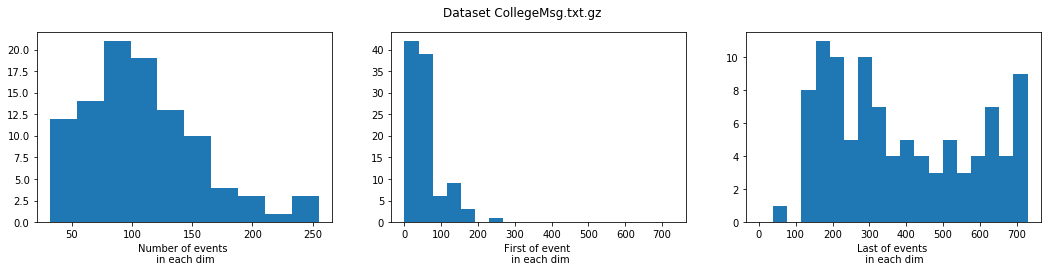

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(18, 3.5))

axs[0].hist(list(map(len, dataset.timestamps)))
axs[0].set_xlabel('Number of events \n in each dim')

end_time = dataset.end_time
axs[1].hist(list(map(min, dataset.timestamps)), bins=np.linspace(0, end_time, 20))
axs[1].set_xlabel('First of event \n in each dim')

axs[2].hist(list(map(max, dataset.timestamps)), bins=np.linspace(0, end_time, 20))
axs[2].set_xlabel('Last of events \n in each dim')

fig.suptitle(f"Dataset {os.path.split(INPUT_PATH)[1]}");

Check ground truth adjacency matrix

In [29]:
adj_mat = nx.adjacency_matrix(dataset.graph, nodelist=list(range(dataset.dim))).toarray()

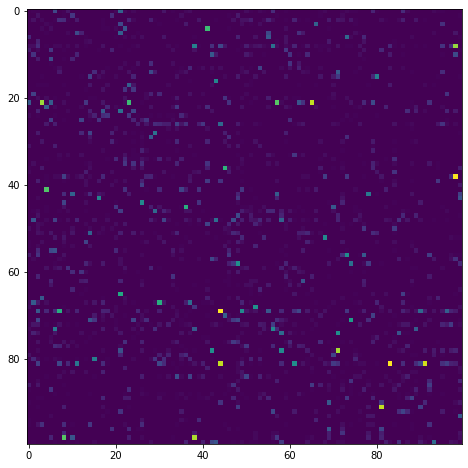

In [30]:
plt.figure(figsize=(8, 8))
plt.imshow(adj_mat);

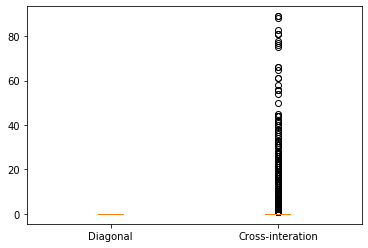

In [31]:
diag_mask = np.eye(adj_mat.shape[0]).astype(bool)
plt.boxplot([adj_mat[diag_mask], adj_mat[~diag_mask]], labels=['Diagonal', 'Cross-interation']);

---

In [33]:
import pickle
with open(os.path.join(INPUT_DIR, 'dataset-collegeMsg.pk'), 'wb') as f:
    pickle.dump(dataset, f)